# PSYC 5P02- Introduction to Programming for Psychology
## Fall 2025

### Problem Set #4 - Grading Rubric

### Assigned November 14 25 - Due November 24
### Late Penalty: 5%/day


### Rubric:
* Accuracy & Efficiency: 50%
* Explaination and documentation: 50%

---

## **Question 1 --- Creating and Exploring Data with NumPy**

You will simulate data for **40 participants**, each completing **50 trials per condition** (100 trials total).

1.  Use NumPy to generate
    * Participant IDs (1-40)
    * Two Conditions: "congruent" and "incongruent"
    * Reaction times:
    - Congruent: mean = 520 ms, SD = 70 ms
    - Incongruent: mean 610 ms, SD = 70 ms
    * Add +/- 20ms uniformly distributed noise to all RTs
2.  Create a Pandas DataFrame with the columns: "participant", "condition", and "rt"
3.  Using the `df.head()` method and the df.describe(), display the first 10 rows of the DataFrame, and teh summary statistics

In [1]:
#importing my libraries
import numpy as np
import random
import pandas as pd

                #### QUESTION 1 #####
#creating a variable for the total number of participants in experiment
part_num = 40

#creating a class that creates an object of imaginary data for each participant
class Participant:
    #setting arguments which is:
    def __init__(self, partID = 0, total_trial = 100, trial_cond = 50, con_mean = 520, con_SD = 70, incon_mean = 610, incon_SD = 70):
        #total_trial = total number of trials in each condition
        self.total_trial = total_trial
        #trial_cond = amount of trials per condition
        self.trial_cond = trial_cond
        #con_mean = the mean of the congruent condition
        self.con_mean = con_mean
        #incon_mean = the mean of the incongruent condition
        self.incon_mean = incon_mean
        #con_SD = the SD of the congruent condition
        self.con_SD = con_SD
        #incon_SD = the SD of the incongruent condition
        self.incon_SD = incon_SD  
        #partID = the participant ID or number
        self.partID = partID
        #creating a list to put all the rts of the congruent trials
        self.con_list = []
        #creating a list to put all the rts of the incongruent trials
        self.incon_list = []
        #creating a list to put all accuricies into it 
        self.acc_list = []
     
        #creating a function to create a list of random rts for the congruent condition 
    def congruent(self):
        #for each trial in the condition (in which there are 50 per condition)
        for n in range(self.trial_cond):
            #generate random numbers in a normal distribution that surrond the con_mean with a SD of the con_Sd and round it to 2 decimel places
            generate = round(random.normalvariate(self.con_mean, self.con_SD), 2)
            #each trial choose between either minusing the number by 20 or adding the generate number by 20 for noise
            rt_vary = random.choice([-20,20])
            #to get the final number for each trial add the rt_vary to the generate
            final_number = generate + rt_vary
            #append the final number to the con_list
            self.con_list.append(final_number)
        #return the con_list so we can use it later
        return self.con_list
    
    #same thing as congruent condition just with incongruent condition instead
    #creating a function to create a list of random rts for the congruent condition 
    def incongruent(self):
        #for each trial in the condition (in which there are 50 per condition)
        for n in range(self.trial_cond):
            #generate random numbers in a normal distribution that surrond the con_mean with a SD of the con_Sd and round it to 2 decimel places
            generate = round(random.normalvariate(self.incon_mean, self.incon_SD), 2)
            #each trial choose between either minusing the number by 20 or adding the generate number by 20 for noise
            rt_vary = random.choice([-20,20])
            #to get the final number for each trial add the rt_vary to the generate
            final_number = generate + rt_vary
            #append the final number to the con_list
            self.incon_list.append(final_number)
         #return the con_list so we can use it later
        return self.incon_list
    
    #doing a QUESTION 3 part here
    #creating a function that creates a list where 80 trials have 1 (meaning accurate) and 20 trials have a 0 (meaning inaccurate)
    def accuracy(self):
        #settig the total number of accurate trials to 80
        trial_accurate = self.total_trial * 0.80
        #setting the total number of inaccurate trials to 20
        trial_inaccurate = self.total_trial * 0.20
        #for each trial that is accurate
        for n in range(int(trial_accurate)):
            #set acc to 1 (which means correct)
            acc = 1
            #append it to accuracy list
            self.acc_list.append(acc)
        #for each trial that is inaccurate
        for n in range(int(trial_inaccurate)):
            #set acc to 0 (which means incorrect)
            acc = 0
            #append it to the accuracy list
            self.acc_list.append(acc)
        #shuffle the list so that it is randomly distributed
        random.shuffle(self.acc_list)
        #return filled accuracy list
        return self.acc_list
        
            
    #creating a dataframe for each participant
    def create_df(self):
        #naming the columns participant for participant number, condition for eitehr congruent or incongruent, and rt for rt time for each trial
        column_names = ['participant', 'condition', 'rt']
        #making a dataframe for the incongruent conditon
        df_incon = pd.DataFrame(columns = column_names)
        #making a dataframe for the congruent conditon
        df_con = pd.DataFrame(columns = column_names)
        acc_column = ['accuracy']
        #making a dataframe for the accuracy amount
        df_acc = pd.DataFrame(columns = acc_column)
        #for the length of the incon_list
        for n in range(len(self.incon_list)):
            #add a row for each item in the incon_list to the df for incon
            #put participant ID in first column
            # make the condition = 0 to represent the incongruent condition for second column
            #and actual rt for that trial in third column
            #we are using .loc method to put the new row of data in index location n (current trial we are on)
            df_incon.loc[n] = [self.partID, 0, self.incon_list[n]]
    
    #for the length of the con_list
        for n in range(len(self.con_list)):
            #add a row for each item in the con_list to the df for con
            #put participant ID in the first column
            #make the condition = 1 to represent the congruent condition for the second column
            #and actual rt for each trial in the third column
            df_con.loc[n] = [self.partID, 1, self.con_list[n]]
        #1 = congruent 
        #0 = incongruent
        #merge the dfs for incon and con together using the concat (since they have the same columns) method (ignoring the index so it does not restart when reading next df) and doing it row by row (axis = 0)
        all_df = pd.concat([df_incon, df_con], ignore_index = True, axis=0)
        
        #for each item in the accuracy list
        for n in range(len(self.acc_list)):
            #add that item to the accuracy dataframe
            df_acc.loc[n] = [self.acc_list[n]]
        #merge the two datframe together and basically add the accuracy column to the main df
        merge_df = pd.concat([all_df, df_acc], axis =1)
        #return the df for the participant with both incongruent and congruent trials when create_df is called
        return merge_df

#Online help:
    #https://stackoverflow.com/questions/6181935/how-do-you-create-different-variable-names-while-in-a-loop

#creating a dictonary for each participant object
participants = {}

#creating a list to hold all the dataframe data
data = []

#for each participant (40 participants)
for n in range(1, part_num + 1):
    #make parts = to a newly created participant object fr each participant
    parts = Participant(partID=n)
    #apply the congruent function to create the list of congruent trials to put in df
    parts.congruent()
    #apply to incongruent function to create the list of incongruent trials to put in df
    parts.incongruent()
    #apply accuracy column to add to eventual df
    parts.accuracy()
    #creating dictonary of all participant objects (this is just for me)
    participants["participant{0}".format(n)] = parts
    #append each participants df that we created to the data list (and do this for all participants)
    data.append(parts.create_df())

#create a new df with the data list of all the data from each participant (again ignoring index so it does not start over)
end_df = pd.concat(data, ignore_index=True)

#taking a peek at the first 10 rows of data in the df
end_df.head(10)

#getting some descriptive data from the total dataframe
end_df.describe()


,participant,condition,rt,accuracy
count,4000.00000,4000.000000,4000.000000,4000.00000
mean,20.50000,0.500000,564.120860,0.80000
std,11.54484,0.500063,86.764933,0.40005
min,1.00000,0.000000,232.800000,0.00000
25%,10.75000,0.000000,503.492500,1.00000
50%,20.50000,0.500000,562.930000,1.00000
75%,30.25000,1.000000,625.505000,1.00000
max,40.00000,1.000000,885.800000,1.00000


**Comments:**
- Good. I'm impressed you tried to solve this using classes. Although less efficient, I think it's a good exercise. 
- However, a lto of inefficiencies in the code. E.g., `def congruent` and `def incongruent` are basically the same code with two variables swapped out. Seems like there might be a better way to do this. The loops in the `create_df` are much less efficient than the need to be I think (is there a way to do this without looping?). There are also much more efficient ways to define your accuracy, e.g., `numpy.random.choices`.
- The code also doesn't print both the head and the summary at the same time when executed all at once. I tried this in Spyder true and this is also the case there.
- Also there was a reason I wanted you to do the step in Question 3 separately. 

- Code 4/6, documentation 6/6 **total: 10/12**

## **Question 2 --- Loading and Cleaning Data with Pandas**



1.  Using **indexing** (do NOT write a loop!), remove trials with RTs below 150 ms or above 1500 ms
2.  Print the number of trials removed.\
3.  Create a **cleaned DataFrame**. 
    * We didn't really cover this in class, so I'm going to give you the code, and you tell me what it's doing:


    `by_participant = clean_df.groupby(["participant", "condition"])["rt"].mean().reset_index()`


In [2]:

#everything put in the clean df is the rts that are bigger than or equal to 150
# and the rts that are smaller or equal to 1500
df_clean = end_df[(end_df['rt'] >= 150) & (end_df['rt'] <= 1500)]

#number of trials removed is the length of end_df - the length of clean df
#no trials removed because this randomized data is very normal due to it being created using the normalvariate function
number_removed = len(end_df) - len(df_clean)

#printing the amount removed
print(number_removed)

#creates a new dataframe (in variable by_participant) that is grouped by participant and condition and puts the mean rts in each set of groups
#reset index is so that it will start at index 0 
by_participant = df_clean.groupby(["participant", "condition"])["rt"].mean().reset_index()


0


**Comments:**
- Good. However, when printing values you may want to add a description of what you are printing for the interest of documentation. 
- code: 3/3, documentation 2/3, **total: 5/6**

## **Question 3 --- Merging DataFrames**

Using the cleaned data

1.  Compute the mean RT for each condition **without using `groupby`**.
    -   Hint: use boolean masks and `.mean()`.\
2.  Add a column called "accuracy", and add value of 1 or 0 to each trial, with a 80% chance of the value being a 1 (correct)\
3.  Re-calcualte the mean RT for each condition for only accurate trials. Feel free to use `groupby` for this. (**NOTE:** In class `groupby` was not working and we thought it was beause it was deprecated. It was only the `axis`` option that was deprecated. `groupby` appears to still very much be a useful tool.

In [3]:

#I gave up the AI won and helped me on this- https://chatgpt.com/ - I almost had it - I was overcomplicating it and had a bunch of useless if statements

#function that creates two new dfs one for congruent condition and the other for incongruent condition
def Cond_list(df, condition1, condition2):
    #create a new df of rows where the condition column is equal to conditon 1 (which will be 1 or congruent)
    #reset_index is just creating a new index and throwing away the old ones (as the numbers are in new positions)
    df1 = df[df['condition'] == condition1].reset_index(drop=True)
    #create a new df made up of rows where the condition column is equal to condition2 (which will be 0 or incongruent)
    #reset_index is just creating a new index and throwing away the old ones (as the numbers are in new positions)
    df2 = df[df['condition'] == condition2].reset_index(drop=True)
    return df1, df2

#applying the function and creating a df for the congruent condition and a df for the incongruent condition
con_df, incon_df = Cond_list(df_clean, 1, 0)

#internet thank you for the help! : https://stackoverflow.com/questions/31037298/pandas-get-column-average-mean
#calculate the mean of only the response time column -first part of bracket selects all the rows and second part of the bracket only selects rt column
#do this for both con_df and incon_df
congruent_mean_rt = con_df.loc[:, 'rt'].mean()
incongruent_mean_rt = incon_df.loc[:, 'rt'].mean()

#printing the means
print(congruent_mean_rt)
print(incongruent_mean_rt)

#creates a new dataframe where the mean of the rts are grouped by condition and accuracy
#also resets the index so it will start at 0 again
by_accuracy = df_clean.groupby(['condition','accuracy'])['rt'].mean().reset_index()


518.0210400000003
610.2206799999991


**comments:**
- Again, I wanted the first part included here which although you did add in Q1, didn't do quite what I wanted. 
- I would have liked to have seen more explanation about what you didn't understand and what chatGPT helped you produce. 
- Again, be clear what is being printed
- code: 4/6, documentation: 3/6 **total: 7/12**

## **Question 4 --- Plotting with Matplotlib**

Using the cleaned RT data from Question 2:

1.  Plot a histogram of RTs for each condition side-by-side (two subplots)\
2.  A mean RT bar graph (congruent vs. incongruent) with standard error error bars. (**Note:** you may need to look at the documentation for `matplotlib bar`) \
3.  Label axes clearly and give descriptive titles.
4.  Change at least 2 properties of the plots from the default options (i.e., colors, markers, axis labels, etc.)

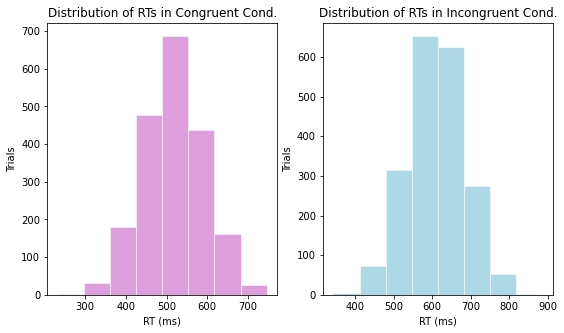

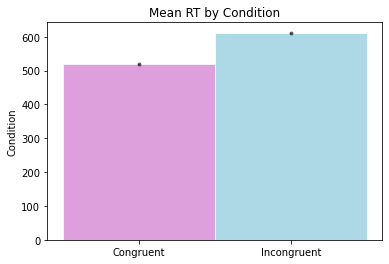

In [4]:

#import libraries
import matplotlib.pyplot as plt
from scipy.stats import sem

#create canvas (figure) to put histogram plots on 
fig = plt.figure(figsize = (14.0, 5.0))

#create subplots for congruent and incongruent graphs of a specific size with congruent first and incongruent second
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)

#create a histogram to detreemine the freuqency of which rt time occurs (8 bins) for congruent condition
ax1.hist(con_df['rt'], color = 'plum', bins=8, linewidth=0.5, edgecolor='white')
#set titke ti congruent RTS
ax1.set_title('Distribution of RTs in Congruent Cond.')
#set xlabel axis to rts
ax1.set_xlabel('RT (ms)')
#set ax1 labels to trials
ax1.set_ylabel('Trials')

#create a histogram for incongruent RTS
ax2.hist(incon_df['rt'], color = 'lightblue', bins=8, linewidth=0.5, edgecolor='white')
#set title to incongruent RTs, for ax2
ax2.set_title('Distribution of RTs in Incongruent Cond.')
#set the x label to RT for ax2
ax2.set_xlabel('RT (ms)')
#set the ylabel to trials for ax2
ax2.set_ylabel('Trials')


#make the layout tite to fit both plots
plt.tight_layout
#show the plots
plt.show()


#setting y-values to the mean of the rt for thecongruent trials and mean of the rt for the incongruent trials
y = [np.mean(con_df['rt']), np.mean(incon_df['rt'])]
#setting our x to the categorical variables of congruent and incongruent
x = ['Congruent', 'Incongruent']

#creates an evenly seperated numerical range (1, 2)
ind = np.arange(2)
#calculating the Standard Error for the SE bars for con and incon = however there is no barley no standard error for this data
SE_con = sem(con_df['rt'])
SE_incon = sem(incon_df['rt'])
#putting the errors in a list to graph the error bars for both con and incon
yerr = [SE_con, SE_incon]
#putting the bars on the plot, x is the congruent and incongruent categories, y is the mean rt
# internet help on error bars = https://stackoverflow.com/questions/68057690/standard-deviation-error-bar-in-bar-chart
conditionrt_plot = plt.bar(x, y, color = ['plum','lightblue'], width=1, edgecolor='white', linewidth=0.7)
#plotting the errorbars on teh graph using the SE (not much error in the graph so does not show up well)
#put the alpha level at 0.05
plt.errorbar(x, y, yerr, fmt='.', color='Black', elinewidth=2, alpha=0.5)
#y label is condition label
plt.ylabel('Condition')
#put plot title
plt.title('Mean RT by Condition')
#x ticks are put as congruent and incongruent
plt.xticks(ind, ('Congruent', 'Incongruent'))
#show the plot
plt.show()

**Commnents:**
- Good. Although y-axis on bottom plot is mis-labelled
- code 6/6, documentation 5/6. **total: 11/12**

## **Question 5 --- Plotting with Seaborn**

Using Seaborn:

1.  Create a violin plot of RTs by condition. (You may need to look at the violin plot documentation)
2.  Create a line plot with condition on the x-axis and RT on the y axis, using different hues for each participant. 


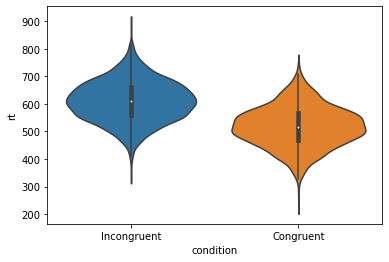

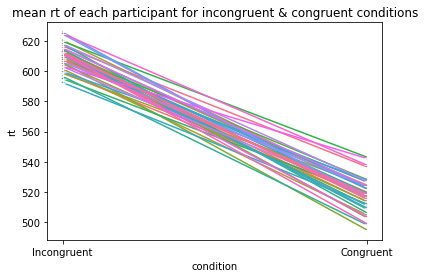

In [6]:
#importing seaborn        
import seaborn as sns

#creating a list of condiitons
x1 = ['Incongruent', 'Congruent']

#creating a violin plot with clean df as the data, the condition for the categories on the x axis, and y axis is equal to the rt
violin = sns.violinplot(data= df_clean, x='condition', y='rt')

#tick setting and renaming: https://stackoverflow.com/questions/56605113/how-to-set-x-axis-ticklabels-in-a-seaborn-plot
#setting the ticks to range 1 and 2 of t(he length of condition - two conditions)
violin.set_xticks(range(len(x1)))
#setting the labels to incongruent and congruent
violin.set_xticklabels(x1)

#show the plot
plt.show()


#create a lineplot , using the mean data of each participant for their incongruent and congruent mean conditions
#uses the pallette husl which generates unlimited colors for the participant hues 
#removes the legend (too many participants)
#marker set to +
lines = sns.lineplot(data= by_participant, x = 'condition', y = 'rt', hue = 'participant', palette='husl', legend = False, marker = '+')
#setting it to only two x ticks to put the labels
lines.set_xticks(range(len(x1)))
#setting the labels as incongruent to congruent
lines.set_xticklabels(x1)

#setting the ttile for the plot
plt.title(label = 'mean rt of each participant for incongruent & congruent conditions')
#show the plot
plt.show()


**Comments:**
- Good!
- code: 3/3, documentation: 3/3, **total: 6/6**


## **Question 6 --- Curve Fitting: Visual Working Memory Capacity**

Researchers often measure visual working memory capacity (K) across
increasing memory loads.\
You are given:

    loads = np.array([1, 2, 3, 4, 5, 6])
    k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

There are different models that describe the change in performance. One is a model that increases linearly up to a breakpoint (capacity limit), then stays flat.\

This is a model with **two stages**:

1.  **Linear growth stage:**\
    Performance increases steadily as memory load increases. 

2.  **Flat stage (capacity limit):**\
    After a certain point (the **breakpoint**), performance stops
    increasing because the memory system has reached its limit.\
    The breakpoint is the **estimated capacity**.


The model can be expressed as:

    if load ≤ k_break:
        y = a * load + b    # K is increasing with load
    else:
        y = a * k_break + b   # K stays constant

The second model is an exponential model. This model can be expressed as:



    y = A * (1 – exp(-B * load)) + C


  1. Fit both models to the data, where x is `load` and y is `k`. Report the relevant parameters for each model.  
  2. Plot both fits on the same Figure and subplot (do not use two subplots) using `matplotlib`


/Users/semrich/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


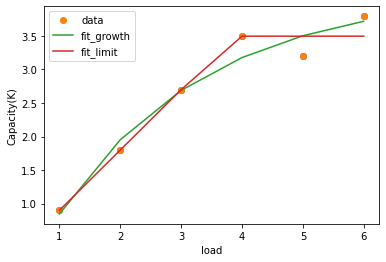

In [7]:
#imporiting scipy library
from scipy.optimize import curve_fit

#increasing memory loads
loads = np.array([1, 2, 3, 4, 5, 6])

#increases lineray to capacity limit in vwm and then flattens out (real cpaacity)
k = np.array([0.9000, 1.8000, 2.7000, 3.5000, 3.1966, 3.7939])

#plot the data with loads as the x-value and k as the y-value
plt.plot(loads, k, 'o')

#create a function where you take the load (amount of items in array, independent variable), the estimated capacity limit (from model), estimated slope and estimated intercept
#to get a model
def capacity_limit(load, k_break, a, b):
    #create a list to store an array of values that is the slope increases
    growth_list = []
    for n in load:
        #if current load is equal to or lower than estimated capacity limit than
        if n <= k_break:
            #slope * current load + intercept
            y = a*n + b
            #append answer to y list
            growth_list.append(y)
        #when load reaches a certain point (beyond capacity limit) k has reached capacity limit and flattens out
        else:
            #y = slope * capacity limit + intercept
            y = a*k_break + b
            #append answer to y list 
            growth_list.append(y)
    #return the growth list as a np.array so it is compatible with the other arrays (k and loads) and curve_fit
    return np.array(growth_list)

#linear exponential growth using the load values (independent variable), a as the maximum value, b as rate of growth (slope), and c as intercept
def linear_growth(load, a, b, c):
    #a is the max value and np.exp increases exponentialy until it reaches the 1 value (b represents the slope) and adds the intercept (starting point)
    #thus creating a list of exponentially increasting values np.exp(-b*load)
    y = a*(1 - np.exp(-b*load)) + c
    return y

               ##LINEAR GROWTH MODEL ###
#determining parameters for our model based on best fit from our real data using our model of exponential growth
params_growth, cov_growth = curve_fit(linear_growth, loads, k)

#assigning a to the max, b to the slope, and c to the intercept
a_growth, b_growth, c_growth = params_growth

#applying our model to our parameters of best fit based on our data and assumption of linear growth
fit_growth = linear_growth(loads, a_growth, b_growth, c_growth)

             ### CAPACITY LIMIT MODEL ###
#determining paramaeters for our model based on best fit from our real data using our model of capacity limit
params_limit, cov_limit = curve_fit(capacity_limit, loads, k)

#assigning k_break to estimated capacity limit, a_limit to the slope, and b_limit to the intercept
k_break, a_limit, b_limit = params_limit

#applying our model to our parameters of best fit based on our data and assumption of capacity limit
fit_limit = capacity_limit(loads, k_break, a_limit, b_limit)

                ###PLOTTING THE DATA AND BEST FIT (regression) LINES ###
#plotting our loads (independent variable) as x axis
#plotting our k (dependent variable) as y axis
plt.plot(loads, k, 'o', label='data')

#plotting our linear growth regression line
plt.plot(loads, fit_growth, '-', label='fit_growth')

#plotting our capacity limit regression line
plt.plot(loads, fit_limit, '-', label='fit_limit')

#setting label of x-axis to load
plt.xlabel('load')
#setting label of y-axis to K
plt.ylabel('Capacity(K)')


#putting our legend with data, fit_growth, and fit_limit
plt.legend()

#showing our plots
plt.show()

**Comments:**
- Parameters from model fit not reported
- Your continuous model has breaks at each value of load, which is not usually how we draw a continuous function. Is there a way to fix this?


- code: 5/6, documentation: 5/6, **total: 10/12**

**Total grade: 49/60**